# 1.- Load dependencies

In [1]:
import os
import sys

# add subpath to notebooks
sys.path.append(os.path.abspath(os.path.join('..')))
# sys.path.append(os.path.abspath(os.path.join('../utils')))
sys.path.append('../')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from imutils.paths import list_images
from dense10_segmentator import DenseSegmentator

import tensorflow as tf

from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
# dynamically grow GPU memory
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/pyt

# 2.- Set path of weights and config file

In [2]:
inifile_path = '../config/segmentator_dense10.ini'
# modelpath = '../models/epoch_124_miou_0.9345.h5'
modelpath = '/home/choppy/TOC/densenet10/models/weights/dense_models/blurry_gemini_dense_miou_0.9275.h5'

# 3.- Instance and load model

In [3]:
model = DenseSegmentator(modelpath=modelpath, inifile_path=inifile_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# 4.- Load example images

In [4]:
# folder_ims = '/home/choppy/TOC/datasets/openeds/ttv/test/images'
folder_ims = "/home/choppy/TOC/datasets/alcohol/alcohol_v7.0"
all_images = sorted([*list_images(folder_ims)])

# 5.- Select image to segmentate

In [5]:
image = model.load_image(path=np.random.choice(all_images)) # random image
# image = model.load_image(all_images[0]) # first image

# 6.- Use "forward" model function to get all image info
### Mask and original image shapes will be equal

In [6]:
info = model.forward(image)

inside else lower mse3


/home/choppy/TOC/densenet10/dense10_segmentator.py:150: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(A, B)


# 7.- Show image and segmentation map given by the segmentator model

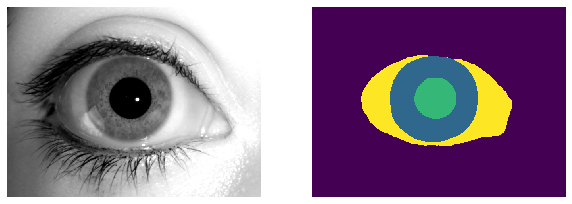

In [7]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.imshow(np.argmax(info['mask'], axis=-1))
plt.axis('off')

plt.show()

# 8.- Print data headers given by the model

In [8]:
list(info.keys())

['pupil_x',
 'pupil_y',
 'pupil_r_min',
 'pupil_r_max',
 'iris_x',
 'iris_y',
 'iris_r_min',
 'iris_r_max',
 'mask',
 'pred_shape',
 'radii_type_estimator',
 'original_shape']

# 9.- Print value of each key

In [9]:
for k in info:
    if k != 'mask': # dont print mask
        print(f'{k}: \t {info[k]}')

pupil_x: 	 232
pupil_y: 	 310
pupil_r_min: 	 52
pupil_r_max: 	 51
iris_x: 	 233
iris_y: 	 306
iris_r_min: 	 111
iris_r_max: 	 108
pred_shape: 	 [320, 320]
radii_type_estimator: 	 mse3
original_shape: 	 [480, 640]


# 10.- Draw circles over predicted regions

inside else lower mse3


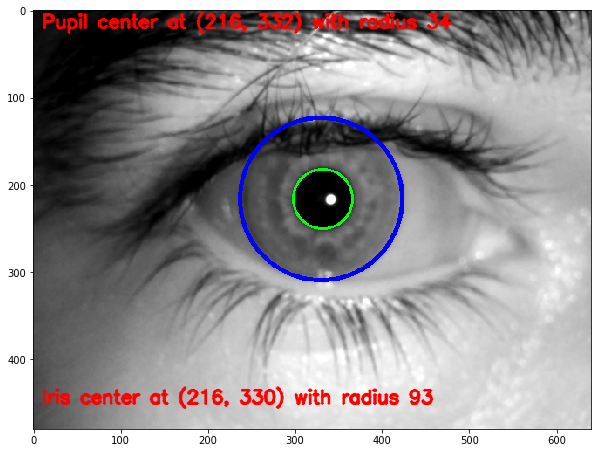

In [10]:
# do inference
im = model.load_image(np.random.choice(all_images))
info = model.forward(im)

# iris
(x, y, r_min, r_max) = (info['iris_x'], info['iris_y'], info['iris_r_min'], info['iris_r_max'])
im = cv2.circle(im, (y, x), r_min, [0, 0, 255], 3)
text = f'Iris center at ({x}, {y}) with radius {r_min}'
cv2.putText(im, text, (10, 450), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)


# pupil
(x, y, r_min, r_max) = (info['pupil_x'], info['pupil_y'], info['pupil_r_min'], info['pupil_r_max'])
im = cv2.circle(im, (y, x), r_min, [0, 255, 10], 2)
text = f'Pupil center at ({x}, {y}) with radius {r_min}'
cv2.putText(im, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)


plt.figure(figsize=(10, 8))
plt.imshow(im)